# Curriculum Examples

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)

In [2]:
die_distribution = stats.randint(1, 7)

In [8]:
die_distribution.rvs()

6

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

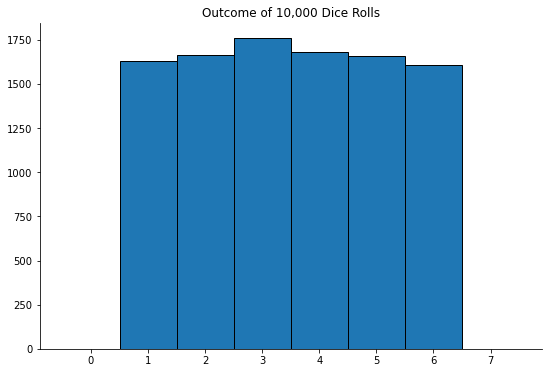

In [10]:
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

In [11]:
# probability of getting a 3 in this distribution
die_distribution.pmf(3)

0.16666666666666666

In [12]:
# can also pass in a list of numbers and get back a list of probabilities
die_distribution.pmf([1, 2, 3])

array([0.16666667, 0.16666667, 0.16666667])

In [13]:
# probability of gettig a 3 or lower (inclusive of value passed)
die_distribution.cdf(3)

0.5

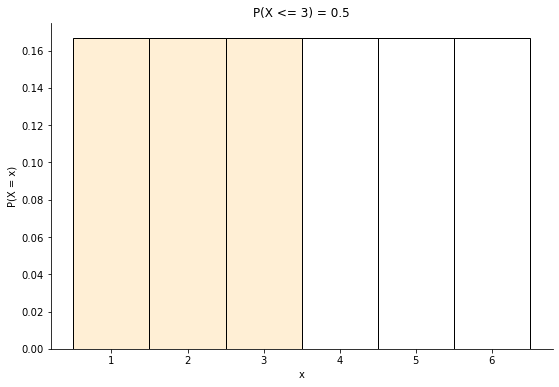

In [15]:
viz.distributions_example1(die_distribution)

In [16]:
# provide the probability to get the cut off value
die_distribution.ppf(5/6)

5.0

In [17]:
# probability of getting above a 4 (exclusive of value passed)
die_distribution.sf(4)

0.33333333333333337

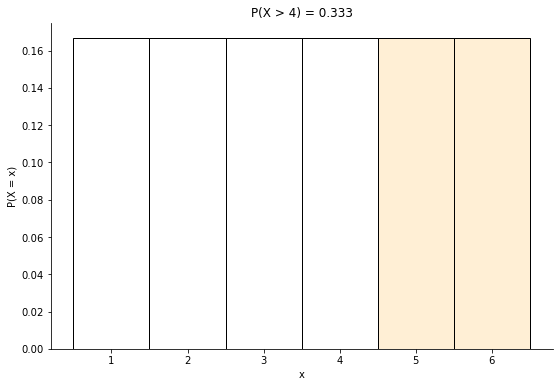

In [18]:
viz.distributions_example2(die_distribution)

In [19]:
# provide value to get probability
die_distribution.isf(1/3)

4.0

In [22]:
test = stats.binom(30, .25)
# number of trials and probability of success

In [24]:
test.rvs(5)

array([4, 9, 6, 8, 1])

In [25]:
# probability of getting more than 10 right
test.sf(10)

0.10572812269266013

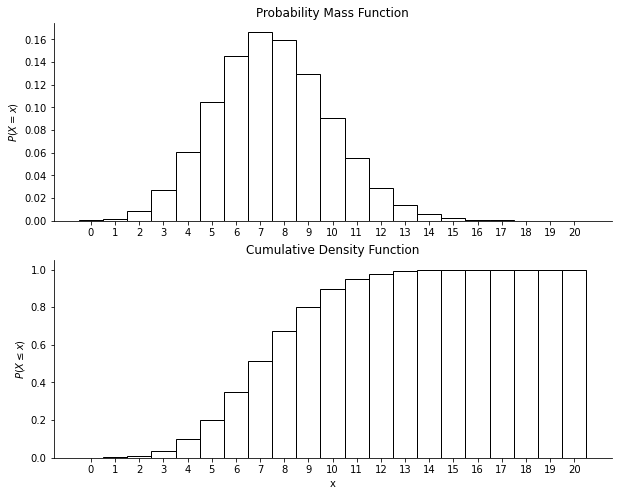

In [26]:
viz.distributions_example3()

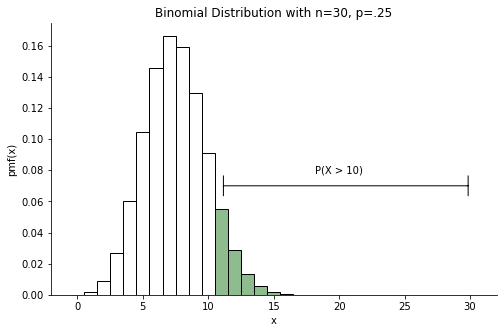

In [27]:
viz.distributions_example4()


In [28]:
stats.binom(20, .05).pmf(0)

0.3584859224085422

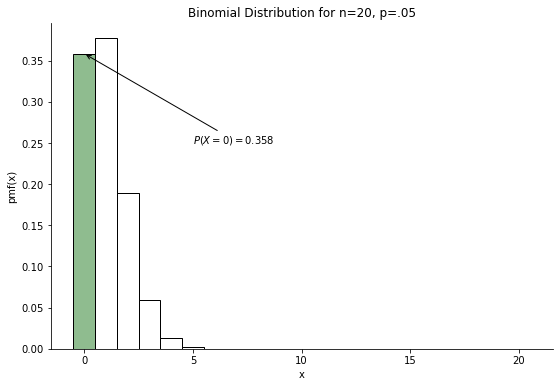

In [29]:
viz.distributions_example5()

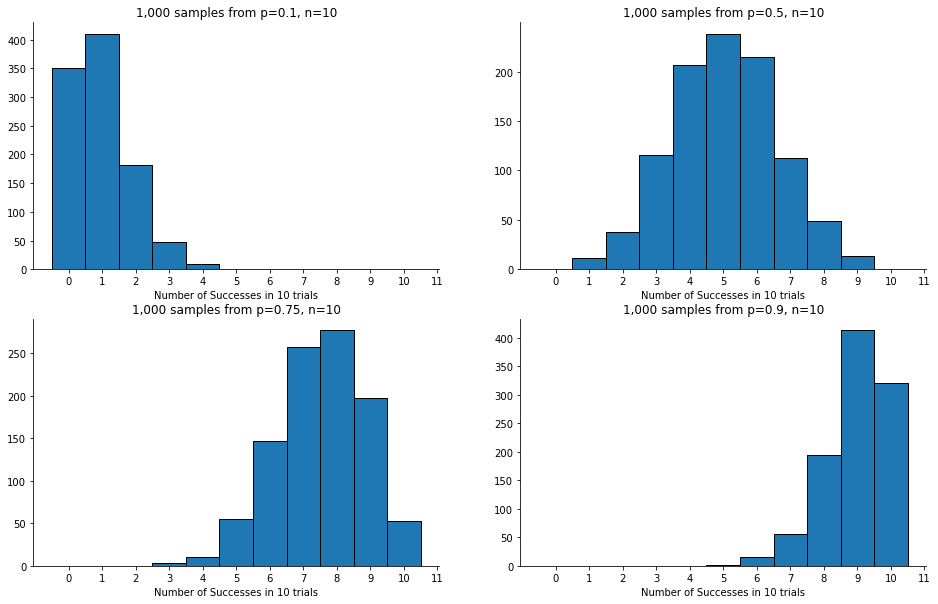

In [30]:
viz.distributions_example6()


In [31]:
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


In [33]:
top10 = sales.isf(0.1)
top10

14563.103131089201

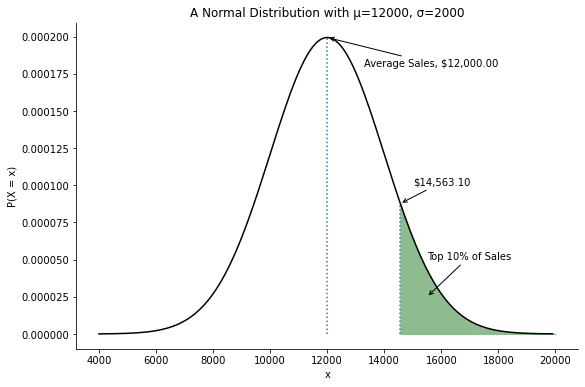

In [34]:
viz.distributions_example7(μ, σ)

In [36]:
p = sales.cdf(10_000)
p

0.15865525393145707

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

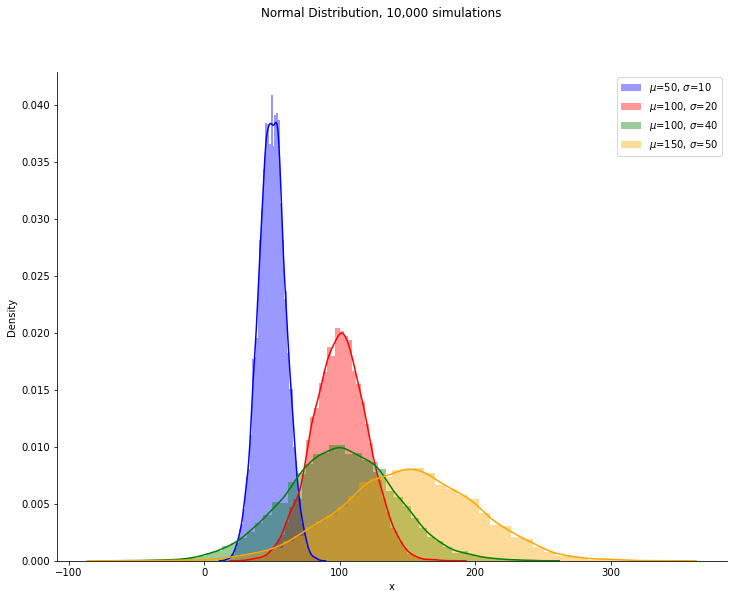

In [37]:
viz.distributions_example8()

In [41]:
stats.poisson(5).pmf(3)

0.1403738958142805

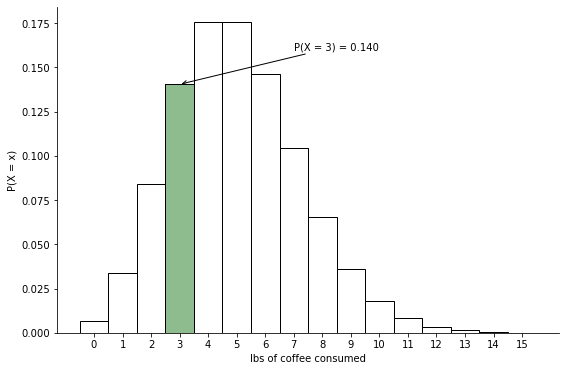

In [39]:
viz.distributions_example10()

In [42]:
stats.poisson(5).sf(7)

0.13337167407000744

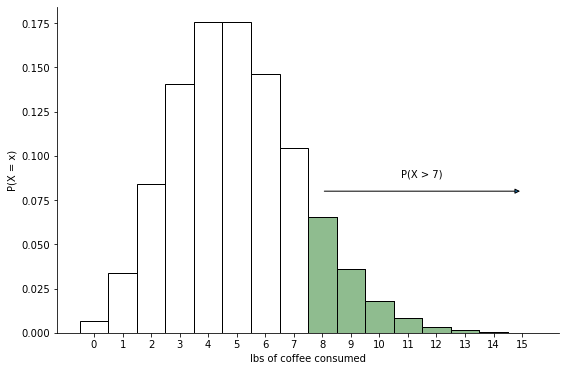

In [43]:
viz.distributions_example11()


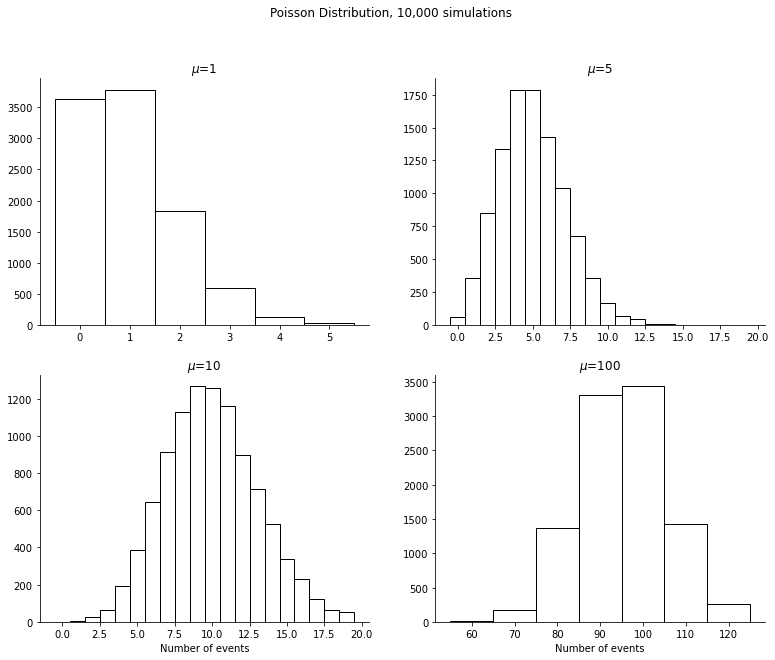

In [44]:
viz.distributions_example12()


# Exercises Theoretical

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

#### 1.

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [46]:
# create the poisson dist
cars = stats.poisson(2)

(array([1.35149e+05, 2.70906e+05, 2.70513e+05, 1.80960e+05, 9.03490e+04,
        3.57310e+04, 1.19120e+04, 3.39400e+03, 8.68000e+02, 2.12000e+02]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

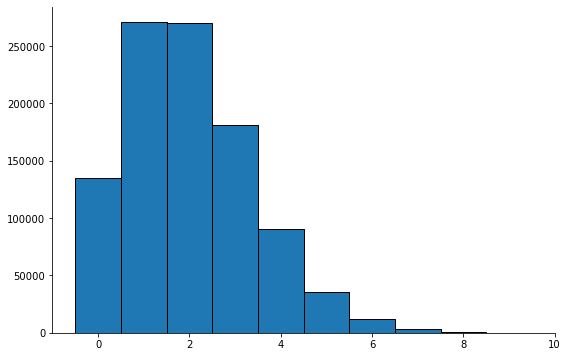

In [155]:
# create a chart of this distribution
n = 1_000_000

x = cars.rvs(n)

# plt.hist(x)
plt.hist(x, bins=range(0, 11), align='left', width=1, edgecolor='black')

In [59]:
# probability of no cars
cars.pmf(0)

0.1353352832366127

In [157]:
# experimental probability
(x == 0).mean()

0.135149

In [159]:
# 3 or more cars 

In [62]:
# could use 1 minues the cdf
1 - cars.cdf(2)

0.3233235838169366

In [63]:
# could use probability of 3 and add prob of more than 3
cars.pmf(3) + cars.sf(3)

0.3233235838169365

In [217]:
# another method
cars.sf(2)

0.32332358381693654

In [158]:
# experimental
(x >= 3).mean()

0.323432

In [64]:
# at least 1 car (1 or more)
1 - cars.cdf(0)

0.8646647167633873

In [65]:
cars.pmf(1) + cars.sf(1)

0.864664716763387

In [218]:
# another method
cars.sf(0)

0.8646647167633873

In [160]:
# experimental
(x >= 1).mean()

0.864851

#### 2.

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [76]:
# create the normal distribution

μ = 3
σ = 0.3

grades = stats.norm(μ, σ)

In [161]:
# add values to distribution

x = grades.rvs(n)

In [80]:
# What grade point average is required to be in the top 5% of the graduating class?

grades.isf(0.05)

3.4934560880854417

In [85]:
grades.ppf(0.95)

3.4934560880854417

In [166]:
# experimental
np.percentile(x, 95)

3.4933754438455096

In [86]:
# What GPA constitutes the bottom 15% of the class?

grades.ppf(0.15)

2.689069983151863

In [87]:
grades.isf(0.85)

2.689069983151863

In [167]:
# experimental
np.percentile(x, 15)

2.6889202150632254

In [93]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom 
# of their class. Determine the range of the third decile. Would a student with a 2.8 grade point 
# average qualify for this scholarship?
# 20 - 30 percentile range

# find GPA for 0.2 first
grades.ppf(0.2)

2.7475136299281258

In [168]:
# experimental
np.percentile(x, 20)

2.7475746950881677

In [94]:
# now find gpa for 0.3
grades.ppf(0.3)

2.842679846187588

In [169]:
# experimental
np.percentile(x, 30)

2.842686031196279

In [ ]:
# Would a student with a 2.8 grade point average qualify for this scholarship?

# Yes, that number is contained in the gpa range defined above

In [96]:
# If I have a GPA of 3.5, what percentile am I in?

grades.cdf(3.5)

0.9522096477271853

In [171]:
# experimental
(x <= 3.5).mean()

0.952191

#### 3.

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [105]:
# binomial distribution
# success = click through
website = stats.binom(4326, 0.02)

website.pmf(97) +  website.sf(97)

0.13975823631333503

In [106]:
1 - website.cdf(96)

0.1397582363130252

In [172]:
# generate some real values
x = website.rvs(n)

In [174]:
(x >= 97).mean()

0.139164

#### 4.

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?

In [120]:
# binomial dist
# success = correct answer
# number of trials = 60
# what is probability of success? 1/100 since probabilites only range from 0-1
# at least one = one or more

hw = stats.binom(60, 1/100)
hw.pmf(1) + hw.sf(1)

0.4528433576092542

In [122]:
1 - hw.cdf(0)

0.4528433576092388

In [220]:
hw.sf(0)

0.4528433576092388

In [177]:
# generate some real values
x = hw.rvs(n)

In [179]:
# experimental probability
(x >= 1).mean()

0.454232

#### 5.

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [223]:
# binomial
# success = student cleans the break area
# probability of success = 0.03
# number of trials = 0.9(66) = 59.4 ~ 59

clean = stats.binom(59, 0.03)

In [224]:
# generate some real numbers

x = clean.rvs(n)

In [196]:
# probability that it gets cleaned up each day
# just need one success or more
clean.pmf(1) + clean.sf(1)

0.8342199288437275

In [226]:
clean.sf(0)

0.8342199288437355

In [197]:
# experimental prob
(x >= 1).mean()

0.834076

In [198]:
# probability that it goes 2 days without being cleaned
# number of trials increases to 59*2 = 118
# 0 successes

clean = stats.binom(118, 0.03)
clean.pmf(0)

0.02748303199257623

In [199]:
# generate some real numbers
x = clean.rvs(n)

In [200]:
# experimental prob
(x == 0 ).mean()

0.02787

In [201]:
# all week without getting cleaned?
# number of trials increases to 59*5 = 295

clean = stats.binom(295, 0.03)
clean.pmf(0)

0.00012521651388091353

In [202]:
# generate some real numbers
x = clean.rvs(n)

In [204]:
# experimental prob
(x == 0).mean()

0.000115

#### 6.

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [116]:
# normal dist
# mean = 15
# std = 3
# 2 (order) + 10 (wait) + 15 (eat)
# each person in front of you takes 2 minutes to order
# what would number of people in line have to be for you to have 15 min left
# 15 = 60 - 2(number of people in line) - 2 - 10
# 16.5 people in line to have 15 min to eat lunch
# At least, therefore 16.5 or less people in line

# create normal dist
line = stats.norm(15, 3)

In [117]:
# we want probability that there are 16.5 or less people in line, therefore .cdf

line.cdf(16.5)

0.6914624612740131

In [205]:
# generate some real numbers
x = line.rvs(n)

In [206]:
# experimental prob
(x <= 16.5).mean()

0.692164

#### 7.

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [118]:
from env import host, user, password

In [119]:
def get_db_url(user, host, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [131]:
query = """
SELECT salary FROM salaries WHERE to_date > CURDATE();
"""

current_salaries = pd.read_sql(query, get_db_url(user, host, password, 'employees'))

In [130]:
current_salaries.head()

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


In [133]:
avg = current_salaries.mean()

In [135]:
std = current_salaries.std()

In [137]:
# create the normal distribution

sal = stats.norm(avg, std)

In [208]:
# generate some real values
x = sal.rvs(n)

In [140]:
# less than 60,000
sal.cdf(60000) - sal.pdf(60000)

array([0.24385742])

In [209]:
# experimental prob
(x < 60_000).mean()

0.243869

In [143]:
# more than 95,000
sal.sf(95000)

array([0.09208819])

In [210]:
# experimental prob
(x > 95_000).mean()

0.092408

In [146]:
# between 65k and 80k (not including edges)
# less than 80k
sal.cdf(80000) - sal.pdf(80000) - sal.cdf(65000)

array([0.33503985])

In [211]:
# experimental prob
((x > 65_000) & (x < 80_000 )).mean()

0.334648

In [215]:
# minimum salary in top 5%

sal.isf(0.05)

array([100484.64454103])

In [216]:
sal.ppf(0.95)

array([100484.64454103])

In [213]:
# experimental prob
np.percentile(x, 95)

100525.72877634513

In [214]:
# If you make 100484.64454103 or more, you are in top 5%